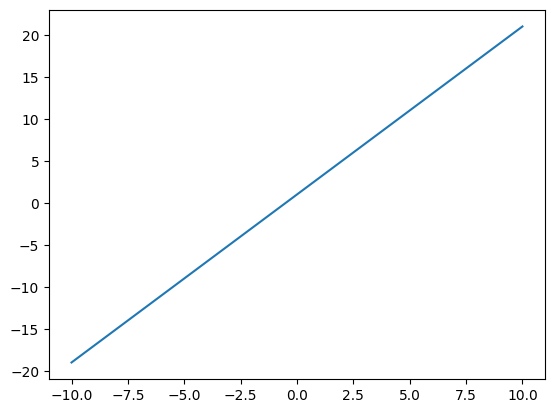

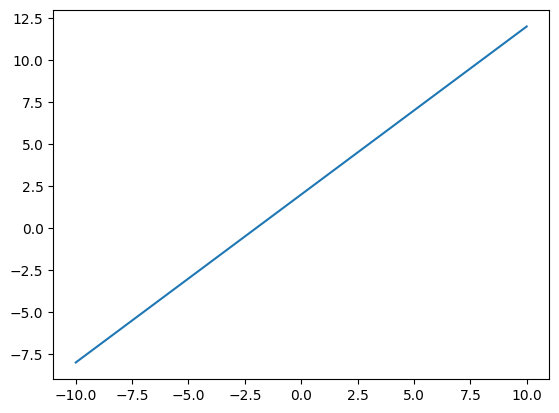

avg = 2


In [ ]:
# method 추가하기: y의 평균값을 출력하는 method
import matplotlib.pyplot as plt
import numpy as np

class linear:
    def __init__(self, a, b): # 인자 두개를 받을 거면, 3개를 만들어야해!, 하나는 무조건 self
        self.a = a
        self.b = b

    def func(self, x): # 중복되는 구문을 함수로 만듦
        return self.a * x + self.b

    def plot_line(self):
        fig = plt.figure()
        ax = fig.add_subplot()
        x = np.linspace(-10, 10, 101)
        #y = self.a * x + self.b
        y  = self.func(x)
        ax.plot(x, y)
        plt.show()

    def avg(self, x1, x2):
        mid = (x1 + x2)/2
        #y = self.a * mid + self.b
        y = self.func(mid)
        print(f'avg = {y}')

line1 = linear(2, 1) # 호출할 때는 self를 굳이 안써도 돼!
# line1.plot_line()
line2 = linear(1, 2)
# line2.plot_line()
line2.avg(-2, 2)

ch 1	 coord (1.0, 0.0)
ch -1	 coord (-1.0, 1.2246467991473532e-16)


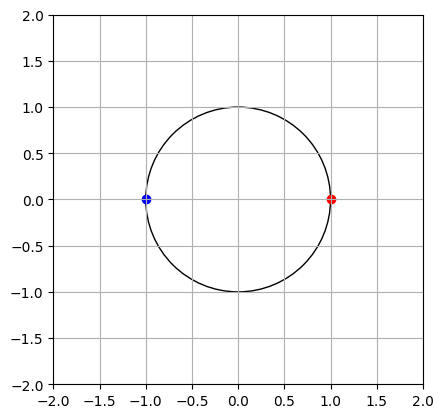

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

class Multi:
    def __init__(self, r, N):
        self.r, self.N = r, N
        self.ch = [(-1)**i for i in range(N)]
        self.coords = [ (r*np.cos(i * 2*np.pi/N), r*np.sin(i * 2*np.pi/N)) \
                       for i in range(N) ]
        self.X, self.Y = self.init_axes()

    def show_charges(self):
        for q, co in zip(self.ch, self.coords):
            print(f"ch {q}\t coord {co}")

    def plot_charges(self):
        fig = plt.figure()
        ax = fig.add_subplot(aspect='equal')

        # plot a circle of radius self.r
        circle = plt.Circle((0, 0), self.r, color='black', fill=False)
        ax.add_patch(circle)

        # plot charges with scatter
        colors = {1: 'red', -1: 'blue'}
        for q, co in zip(self.ch, self.coords):
            ax.scatter(*co, color=colors[q])  # co = co[0], co[1]

        # set plot range
        margin = 1
        ax.set_xlim([-self.r-1, self.r+1])
        ax.set_ylim([-self.r-1, self.r+1])

        # show grid
        ax.grid()

    def init_axes(self, Nplot=100):
        x = np.linspace(-3, 3, Nplot)
        y = np.linspace(-3, 3, Nplot)
        xx, yy = np.meshgrid(x, y)
        return xx, yy

    def compute_field_single(self, q, ri, x, y):
        deno = np.sqrt((x-ri[0])**2 + (y-ri[1])**2) ** 3
        return q / deno * (x-ri[0]), q / deno * (y-ri[1])

    def compute_field(self, X, Y):
        Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)
        for q, r in zip(self.ch, self.coords):
            ex, ey = self.compute_field_single(q, r, X, Y)
            Ex += ex
            Ey += ey
        return Ex, Ey

    def compute_pot_single(self, qi, ri, x, y):
        deno = np.sqrt((x-ri[0])**2 + (y-ri[1])**2)
        return qi / deno

    def compute_pot(self, X, Y):
        pot_total = 0
        for q, r in zip(self.ch, self.coords):
            pot_total += self.compute_pot_single(q, r, X, Y)
        return pot_total

    def plot_pot(self, ax=None):
        self.pot_ = self.compute_pot(self.X, self.Y)
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(aspect='equal')
        cf = ax.contourf(self.X, self.Y, self.pot_, cmap=cm.seismic, levels=101)
        return cf

    def plot_field(self, ax=None, quiver=False):
        self.field_ = self.compute_field(self.X, self.Y)
        if ax == None:
            fig = plt.figure()
            ax = fig.add_subplot(aspect='equal')
        Ex, Ey = self.field_
        if quiver:
            ax.quiver(self.X, self.Y, Ex, Ey)
        else:
            ax.streamplot(self.X, self.Y, Ex, Ey, density=2)

dipole = Multi(1, 2)
# 메서드 함수를 호출할 때 첫번째 인자인 self는 명시적으로 쓰지 않음 (항상 클래스 자기 자신이므로)
dipole.show_charges()
dipole.plot_charges()

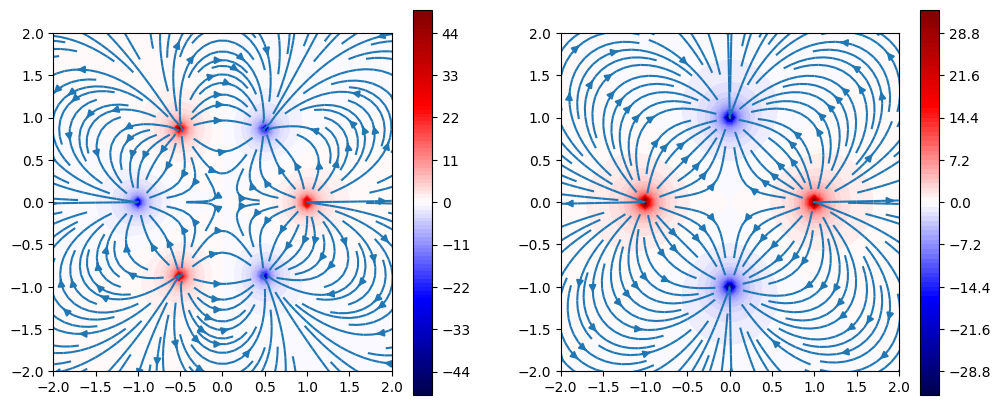

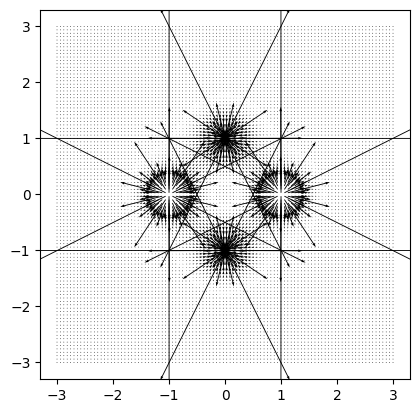

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, aspect='equal')
ax2 = fig.add_subplot(122, aspect='equal')

hexapole = Multi(1, 6)
hexapole.plot_field(ax=ax1)
cf = hexapole.plot_pot(ax=ax1)
plt.colorbar(cf, ax=ax1)

quad = Multi(1, 4)
quad.plot_field(ax=ax2)
cf = quad.plot_pot(ax=ax2)
plt.colorbar(cf, ax=ax2)

# ax를 나타내는 클래스
for a in [ax1, ax2]:
    a.set_xlim([-2, 2])
    a.set_ylim([-2, 2])

plt.show()

quad.plot_field(quiver=True)
plt.show()